In [158]:
#Imports 
from matplotlib import pyplot as plt
from tqdm import tqdm 
import pandas as pd 

In [223]:
#Read data
flights             = pd.read_csv('../../data/Airports2.csv')
flights['Fly_date'] = pd.to_datetime(flights['Fly_date'])
flights['dstate']   = flights['Destination_city'].apply(lambda x: x[-2:])
flights['ostate']   = flights['Origin_city'].apply(lambda x: x[-2:])
flights['month']    = flights['Fly_date'].dt.month
flights['year']     = flights['Fly_date'].dt.year

# Get top airports
all_airports        = pd.concat([flights['Origin_airport'], flights['Destination_airport']])
top_airports        = list(all_airports.value_counts().head(30).index)
# top_airports      = list(flights.loc[flights['dstate'].apply(lambda x: x in ['CO', 'LA']), 'Destination_airport'].unique())
airport_encoding    = {airport:i for i, airport in enumerate(top_airports)}

# Only flights from top airports
flights             = flights[flights.apply(lambda x: (x['Origin_airport'] in top_airports) and (x['Destination_airport'] in top_airports), axis=1)]

# Aggregate (sum) passengers, flights and distance
tmp                 = flights.groupby(['Origin_airport', 'Destination_airport', 'Fly_date'])
sums                = tmp.sum().reset_index()
sums                = sums[sums['Distance'] > 0]

# Filter one year of data
new_flights         = sums[['Origin_airport', 'Destination_airport', 'Fly_date', 'Passengers']]
new_flights         = new_flights.reset_index(drop=True)

# one_year = new_flights[new_flights['Fly_date'].apply(lambda x: x.year in range(1990, 2000))]
one_year            = new_flights[new_flights['Fly_date'].apply(lambda x: x.year == 1990)]
T                   = sorted(one_year['Fly_date'].unique())
date_encoding       = {v:i for i, v in enumerate(T)}
one_year['Fly_date']=one_year['Fly_date'].replace(date_encoding)
one_year['Fly_date']= one_year['Fly_date'] + 1
one_year            = one_year.reset_index(drop=True)
one_year            = one_year[one_year['Passengers'] > 0]

/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_14763/2173331036.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_year['Fly_date']=one_year['Fly_date'].replace(date_encoding)
/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_14763/2173331036.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_year['Fly_date']= one_year['Fly_date'] + 1


# MCMC

In [ ]:
def mcmc1(n_walks):
    walks = []
    times = sorted(one_year['Fly_date'].unique())
    for i in tqdm(range(n_walks)):
        walk = []
        for t in times:
            tmp = one_year[(one_year['Fly_date'] == t)]
            if t > 1:
                tmp = tmp[tmp['Origin_airport'] == destination]
                if len(tmp) == 0:
                    continue
            flight = tmp.sample(n=1, weights='Passengers')
            destination = flight['Destination_airport'].values[0]
            origin = flight['Origin_airport'].values[0]
            walk.append("%s_%s" % (origin, t))
        walk.append("%s_%s" % (destination, t+1))
        walks.append(walk)
    return walks

In [249]:
def mcmc2(n_walks, time_steps):
    walks = []
    n_walks = 100
    for i in tqdm(range(n_walks)):
        for t1 in range(2, time_steps+1):
            walk = []
            for t2 in range(1, t1):
                print(t2, t1)
                tmp = one_year[(one_year['Fly_date'] == t2)]
                if t2 > 1:
                    tmp = tmp[tmp['Origin_airport'] == destination]
                    if len(tmp) == 0:
                        continue
                flight = tmp.sample(n=1, weights='Passengers')
                destination = flight['Destination_airport'].values[0]
                origin = flight['Origin_airport'].values[0]
                walk.append("%s_%s" % (origin, t2))
            walk.append("%s_%s" % (destination, t2+1))
            walks.append(walk)
    return walks

n_walks = 1000
time_steps = len(date_encoding)
# walks = mcmc1(n_walks)
walks = mcmc2(n_walks, time_steps)
pd.DataFrame(walks).to_csv('walks.csv')

  2%|▏         | 2/100 [00:00<00:05, 17.38it/s]

1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7

  7%|▋         | 7/100 [00:00<00:05, 18.47it/s]

3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 

  9%|▉         | 9/100 [00:00<00:05, 17.27it/s]

1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10


 13%|█▎        | 13/100 [00:00<00:05, 16.58it/s]

3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10

 15%|█▌        | 15/100 [00:00<00:05, 16.23it/s]

 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12


 19%|█▉        | 19/100 [00:01<00:05, 15.69it/s]

5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12


 21%|██        | 21/100 [00:01<00:05, 15.49it/s]

1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11


 25%|██▌       | 25/100 [00:01<00:04, 15.25it/s]

7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5

 29%|██▉       | 29/100 [00:01<00:04, 16.27it/s]

 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10


 31%|███       | 31/100 [00:01<00:04, 16.10it/s]

7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10


 35%|███▌      | 35/100 [00:02<00:04, 15.81it/s]

4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 1

 39%|███▉      | 39/100 [00:02<00:03, 17.24it/s]

1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1

 41%|████      | 41/100 [00:02<00:03, 16.62it/s]

10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7

 45%|████▌     | 45/100 [00:02<00:03, 14.67it/s]

 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4

 47%|████▋     | 47/100 [00:02<00:03, 15.00it/s]

 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6

 51%|█████     | 51/100 [00:03<00:03, 14.96it/s]

 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7


 53%|█████▎    | 53/100 [00:03<00:03, 14.14it/s]

1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1

 57%|█████▋    | 57/100 [00:03<00:02, 15.02it/s]

 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9


 61%|██████    | 61/100 [00:03<00:02, 16.51it/s]

5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 

 63%|██████▎   | 63/100 [00:03<00:02, 15.66it/s]

 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1

 65%|██████▌   | 65/100 [00:04<00:02, 15.13it/s]

 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11


 69%|██████▉   | 69/100 [00:04<00:02, 14.62it/s]

8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12


 71%|███████   | 71/100 [00:04<00:01, 15.38it/s]

2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5

 76%|███████▌  | 76/100 [00:04<00:01, 17.79it/s]

6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5

 80%|████████  | 80/100 [00:05<00:01, 17.12it/s]

4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5


 84%|████████▍ | 84/100 [00:05<00:00, 17.09it/s]

1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7


 86%|████████▌ | 86/100 [00:05<00:00, 16.01it/s]

4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8


 90%|█████████ | 90/100 [00:05<00:00, 16.50it/s]

4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4

 94%|█████████▍| 94/100 [00:05<00:00, 17.83it/s]

2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2

 98%|█████████▊| 98/100 [00:06<00:00, 18.15it/s]

4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7

100%|██████████| 100/100 [00:06<00:00, 16.21it/s]

 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
1 2
1 3
2 3
1 4
2 4
3 4
1 5
2 5
3 5
4 5
1 6
2 6
3 6
4 6
5 6
1 7
2 7
3 7
4 7
5 7
6 7
1 8
2 8
3 8
4 8
5 8
6 8
7 8
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12


  0%|          | 0/100 [00:00<?, ?it/s]

2 1


  2%|▏         | 2/100 [00:00<00:19,  5.06it/s]

3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5


  4%|▍         | 4/100 [00:00<00:10,  8.84it/s]

7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1


  8%|▊         | 8/100 [00:00<00:07, 13.02it/s]

9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
1

 12%|█▏        | 12/100 [00:01<00:05, 15.21it/s]

12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6

 14%|█▍        | 14/100 [00:01<00:05, 14.42it/s]

9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8


 16%|█▌        | 16/100 [00:01<00:05, 14.00it/s]

11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8

 20%|██        | 20/100 [00:01<00:05, 13.66it/s]

 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7

 22%|██▏       | 22/100 [00:01<00:05, 13.22it/s]

 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4


 26%|██▌       | 26/100 [00:02<00:05, 14.42it/s]

12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3


 28%|██▊       | 28/100 [00:02<00:04, 14.95it/s]

6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10

 32%|███▏      | 32/100 [00:02<00:04, 16.02it/s]


12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4


 36%|███▌      | 36/100 [00:02<00:03, 16.63it/s]

6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
1

 40%|████      | 40/100 [00:02<00:03, 17.06it/s]

10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12

 42%|████▏     | 42/100 [00:02<00:03, 16.56it/s]

6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1


 46%|████▌     | 46/100 [00:03<00:03, 16.42it/s]

6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2

 50%|█████     | 50/100 [00:03<00:02, 17.92it/s]

11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 

 54%|█████▍    | 54/100 [00:03<00:02, 18.20it/s]

10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 

 56%|█████▌    | 56/100 [00:03<00:02, 17.83it/s]

7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
1

 60%|██████    | 60/100 [00:04<00:02, 17.50it/s]

11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 

 64%|██████▍   | 64/100 [00:04<00:02, 17.45it/s]

7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5


 68%|██████▊   | 68/100 [00:04<00:01, 18.39it/s]

12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7

 72%|███████▏  | 72/100 [00:04<00:01, 18.63it/s]

11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3


 74%|███████▍  | 74/100 [00:04<00:01, 16.91it/s]

 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3


 78%|███████▊  | 78/100 [00:05<00:01, 16.29it/s]

8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10

 82%|████████▏ | 82/100 [00:05<00:01, 16.78it/s]

 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5


 84%|████████▍ | 84/100 [00:05<00:00, 17.31it/s]

4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9

 88%|████████▊ | 88/100 [00:05<00:00, 18.08it/s]

12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2

 92%|█████████▏| 92/100 [00:05<00:00, 17.66it/s]

10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12

 96%|█████████▌| 96/100 [00:06<00:00, 17.60it/s]

4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9

100%|██████████| 100/100 [00:06<00:00, 15.87it/s]

 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
2 1
3 1
3 2
4 1
4 2
4 3
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
7 6
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10

In [245]:
pd.DataFrame(walks)

,0,1,2,3,4,5,6,7,8,9,10,11
0,ORD_1,BOS_2,None,None,None,None,None,None,None,None,None,None
1,DTW_1,DCA_2,LGA_3,None,None,None,None,None,None,None,None,None
2,ORD_1,DTW_2,MCO_3,LGA_4,None,None,None,None,None,None,None,None
3,IAH_1,DFW_2,BOS_3,IAD_4,MCO_5,None,None,None,None,None,None,None
4,DCA_1,EWR_2,ORD_3,PIT_4,CLT_5,PIT_6,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,LAS_1,DFW_2,BOS_3,ORD_4,CLE_5,IND_6,ORD_7,PHL_8,None,None,None,None
1096,DCA_1,TPA_2,ATL_3,MEM_4,ATL_5,MCO_6,LGA_7,ATL_8,DCA_9,None,None,None
1097,LAX_1,SEA_2,DFW_3,LAS_4,SLC_5,ORD_6,STL_7,CLE_8,TPA_9,DFW_10,None,None
1098,PHX_1,DFW_2,STL_3,MSP_4,CLT_5,MCO_6,JFK_7,LAX_8,SEA_9,LAX_10,DFW_11,None


## Node Positioning

Create a static adjacency matrix for the graph.


In [178]:
matrix = pd.DataFrame(0, index=top_airports, columns=top_airports)
for i in tqdm(range(len(one_year))):
    row = one_year.iloc[i]
    matrix.loc[row['Origin_airport'], row['Destination_airport']] += row['Passengers']

100%|██████████| 9246/9246 [00:01<00:00, 8873.75it/s]


In [179]:
#Clustering (static adjacency matrix)

from sklearn.cluster import AgglomerativeClustering, KMeans
# sc = AgglomerativeClustering(n_clusters=3)
sc = KMeans(n_clusters=2, random_state=42)
clusters = sc.fit_predict(matrix)

In [195]:
clusters_series = pd.Series(data=clusters, index=matrix.index).sort_values()
clusters_series.name = 'cluster'

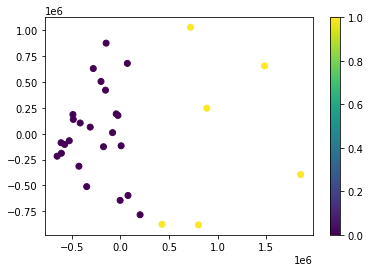

In [190]:
# Dimensionality reduction to 2-dimensional space 
# for visualization of clusters

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(matrix)
reduced = pd.DataFrame(reduced)
plt.scatter(reduced[0], reduced[1], c=clusters);
plt.colorbar();

In [191]:
# # Creating a mapping between airports and clusters

# clusters_dict = dict(zip(matrix.index,clusters))
# clusters_series = pd.Series(clusters_dict).sort_values()
# clusters_series.name = 'cluster'

# la_airs = flights.loc[flights['dstate']=='LA', 'Destination_airport'].unique()
# co_airs = flights.loc[flights['dstate']=='CO', 'Destination_airport'].unique()

# clusters = {air: 0 for air in la_airs}
# clusters.update({air: 1 for air in co_airs})
# clusters_series = pd.Series(clusters)
# clusters_series.name = 'cluster'

In [192]:
# Sorting top airports by their cluster number 

top_airports.sort(key=lambda x: clusters_series.loc[x])

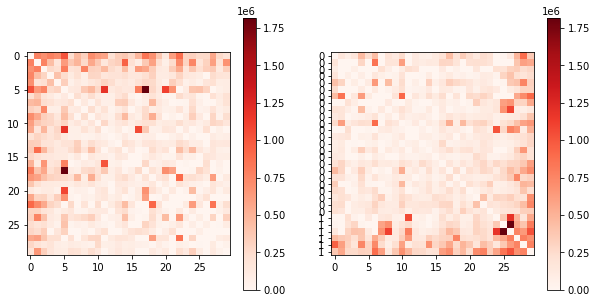

In [193]:
# Visualizing the adjacency matrix before and after sorting by clusters

fig, axs = plt.subplots(1, 2, figsize=(10,5))

img = axs[0].imshow(matrix, cmap='Reds');
fig.colorbar(img, ax=axs[0]);

matrix_2 = matrix.loc[clusters_series.index, clusters_series.index]
img = axs[1].imshow(matrix_2, cmap='Reds');
axs[1].set_yticks(range(len(matrix_2)), clusters_series.values);
fig.colorbar(img, ax=axs[1]);


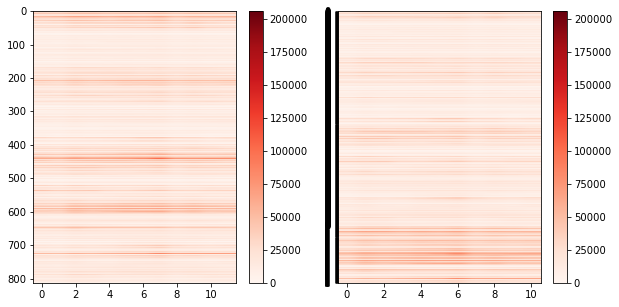

In [196]:
# Visualizing the carpet plot before and after sorting by clusters

carpet = one_year.pivot_table(index=['Origin_airport', 'Destination_airport'], \
    columns='Fly_date', values='Passengers', aggfunc='sum').fillna(0).reset_index()

carpet2 = pd.merge(clusters_series, carpet, right_on='Origin_airport', left_index=True)
carpet2 = carpet2.sort_values(['cluster', 'Origin_airport'])
carpet2.reset_index(drop=True, inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
img = axs[0].imshow(carpet[carpet.columns[2:]], cmap='Reds', aspect='auto');
fig.colorbar(img, ax=axs[0]);
img = axs[1].imshow(carpet2[carpet.columns[3:]], cmap='Reds', aspect='auto');
# axs[1].set_yticks(carpet2.index[::10], carpet2['cluster'][::10].values);
axs[1].set_yticks(carpet2.index, carpet2['cluster'].values);
fig.colorbar(img, ax=axs[1]);

## Flights for airport grid

In [197]:
merged  = pd.merge(one_year, clusters_series, left_on='Origin_airport', right_index=True)
merged2 = pd.merge(merged, clusters_series, left_on='Destination_airport', right_index=True, suffixes=('_origin', '_destination'))

In [198]:
cluster_stats = merged2.groupby(['cluster_origin', 'cluster_destination']).apply(\
                    lambda x: pd.Series({'size': x.size, 'sum': x['Passengers'].sum()})).reset_index()

cluster_stats.sort_values(['size'], ascending=False)

,cluster_origin,cluster_destination,size,sum
0,0,0,34248,70648843
2,1,0,9582,41270449
1,0,1,9486,41133431
3,1,1,2160,21946359


In [199]:
merged2.head()

,Origin_airport,Destination_airport,Fly_date,Passengers,cluster_origin,cluster_destination
0,ATL,BOS,1,41096,1,0
1,ATL,BOS,2,43104,1,0
2,ATL,BOS,3,54677,1,0
3,ATL,BOS,4,54791,1,0
4,ATL,BOS,5,51437,1,0


In [200]:
merged2.sort_values(['Passengers'], ascending=False).head(10)

,Origin_airport,Destination_airport,Fly_date,Passengers,cluster_origin,cluster_destination
5045,LAX,SFO,8,206246,1,1
8312,SFO,LAX,8,195178,1,1
8315,SFO,LAX,11,174578,1,1
5048,LAX,SFO,11,174297,1,1
8316,SFO,LAX,12,173608,1,1
5049,LAX,SFO,12,169510,1,1
5047,LAX,SFO,10,161857,1,1
8314,SFO,LAX,10,160106,1,1
5046,LAX,SFO,9,157351,1,1
8313,SFO,LAX,9,157280,1,1


In [201]:
merged2['color'] = merged2.apply(lambda x: "red" if x['cluster_origin'] == x['cluster_destination'] else "blue", axis=1)
merged2['Origin_airport']      = merged2.apply(lambda x: "%s_%s" % (x['Origin_airport'],      x['Fly_date']), axis=1)
merged2['Destination_airport'] = merged2.apply(lambda x: "%s_%s" % (x['Destination_airport'], x['Fly_date']+1), axis=1)

In [202]:

merged2 = merged2[['Origin_airport', 'Destination_airport', 'Passengers', 'color']]
merged2.columns = ['origin', 'destination', 'count', 'color']
merged2.to_csv('flights.csv', index=False)

## Grid Positioning 

$ (t*c_x, i*c_y)$ where $i \in [0, N]$  and $t \in [0, T]$ such that $N$ is number of nodes (e.g. airports) and $T$ is time (e.g. days). 

$c_x$ and $c_y$ are constants that define the distance distance from origin $(0, 0)$ as well as between other nodes. 

In [212]:
locs = []

# width = 960
# height = 600
time_steps = len(date_encoding)
c_x = time_steps*6
c_y = 20
# for k in airport_encoding:
    # i = airport_encoding[k]
for i, k in enumerate(clusters_series.index):
    for t in range(1, time_steps+2): #list(date_encoding.values()):
        locs.append(["%s_%s" % (k,t), (t+1)*c_x, (i+1)*c_y, clusters_series[k]])
locs_df = pd.DataFrame(locs)


In [213]:

locs_df.columns = ['iata', 'latitude', 'longitude', 'cluster']

cluster_colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

locs_df['color'] = locs_df['cluster'].apply(lambda x: cluster_colors[x])

In [214]:
clusters_series.reset_index().groupby('cluster').apply(lambda x: list(x['index'].values))

cluster
0    [MCO, DCA, SLC, IAD, MIA, BWI, LGA, SEA, JFK, ...
1                       [PHX, SFO, LAX, DFW, ATL, ORD]
dtype: object

In [215]:
locs_df

,iata,latitude,longitude,cluster,color
0,MCO_1,140,20,0,red
1,MCO_2,210,20,0,red
2,MCO_3,280,20,0,red
3,MCO_4,350,20,0,red
4,MCO_5,420,20,0,red
...,...,...,...,...,...
385,ORD_9,700,600,1,blue
386,ORD_10,770,600,1,blue
387,ORD_11,840,600,1,blue
388,ORD_12,910,600,1,blue


In [216]:


# locs_df['latitude']  = locs_df['latitude']
# locs_df['latitude']  = locs_df['latitude']
locs_df.to_csv('grid_locs.csv', index=False)

In [211]:
pd.DataFrame(walks)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,CLT_1,ORD_2,PHL_3,MCO_4,ORD_5,SEA_6,SLC_7,DFW_8,BOS_9,DCA_10,STL_11,IND_12,CLT_13
1,MSP_1,DTW_2,MCO_3,DFW_4,BOS_5,LGA_6,STL_7,ORD_8,DTW_9,CVG_10,ATL_11,DCA_12,ATL_13
2,MEM_1,IAH_2,DFW_3,IAH_4,DFW_5,DTW_6,PHL_7,ATL_8,LGA_9,DFW_10,LAS_11,PHX_12,LAX_13
3,EWR_1,ATL_2,MCO_3,LGA_4,MIA_5,JFK_6,SFO_7,PHX_8,DTW_9,CLT_10,PHL_11,DTW_12,CLE_13
4,TPA_1,MSP_2,DTW_3,TPA_4,DTW_5,DCA_6,ORD_7,LAX_8,ORD_9,LGA_10,BOS_11,ORD_12,CVG_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MCO_1,BWI_2,DFW_3,SFO_4,LAX_5,ORD_6,BOS_7,DCA_8,MEM_9,ORD_10,CLE_11,MSP_12,PIT_13
996,LGA_1,BOS_2,ORD_3,DFW_4,STL_5,CVG_6,CLT_7,SFO_8,DFW_9,LAX_10,SEA_11,ORD_12,MCO_13
997,JFK_1,LAX_2,JFK_3,STL_4,CLT_5,ATL_6,CLT_7,ATL_8,SEA_9,MSP_10,ORD_11,EWR_12,LAX_13
998,SLC_1,ORD_2,PIT_3,LGA_4,BOS_5,PHL_6,CLT_7,STL_8,BOS_9,LGA_10,MCO_11,ORD_12,EWR_13
